### Multiple Linear Regression
When a model predicts numerical target values based on more than one predictor, then it becomes a multiple linear regression model.

In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#import warnings
#warnings.filterwarnings('ignore')

#### Read data
In this demo, we are going to work on delivery dataset, where delivery time is calculated based on the number of products to be delivered and the distance to be covered.

In [3]:
# read the data from input csv file
delivery = pd.read_csv("datasets/delivery.csv")

In [4]:
# view sample data
delivery.head()

,n.prod,distance,delTime
0,7,560,16.68
1,3,220,11.50
2,3,340,12.03
3,4,80,14.88
4,6,150,13.75


#### <font color='blue'>Feature Engineering</font>
we will get some insights from the data to help us build our model.

In [5]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   n.prod    25 non-null     int64  
 1   distance  25 non-null     int64  
 2   delTime   25 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 728.0 bytes


In [6]:
delivery.describe()

,n.prod,distance,delTime
count,25.000000,25.000000,25.000000
mean,8.760000,409.280000,22.384000
std,6.881618,325.188089,15.524903
min,2.000000,36.000000,8.000000
25%,4.000000,150.000000,13.750000
50%,7.000000,330.000000,18.110000
75%,10.000000,605.000000,21.500000
max,30.000000,1460.000000,79.240000


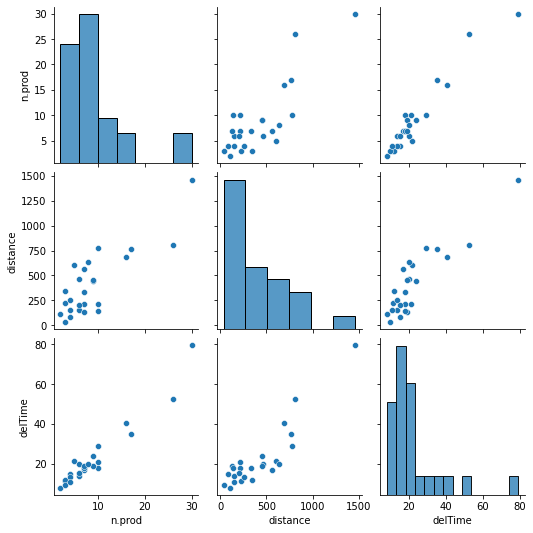

In [7]:
# Visualizing data
import seaborn as sns
sns.pairplot(delivery)

#### Building Multiple Linear Model

In [8]:
# importing the required module to build the model
from sklearn.linear_model import LinearRegression

In [9]:
# Instantiating the algorithm for building the model
model = LinearRegression()

# selecting the predictors and targets
X = delivery[["n.prod","distance"]]
y = delivery["delTime"]

# building the model using fit() method
model.fit(X,y)

print("Intercept:",model.intercept_ ,"\nCoefficients:",model.coef_)

# Sample output for the above code
# Intercept: 2.3412311451922 
# Coefficients: [1.61590721 0.01438483]

Intercept: 2.3412311451922037 
Coefficients: [1.61590721 0.01438483]


#### Visualizing the model

Text(0.5, 0, 'delTime')

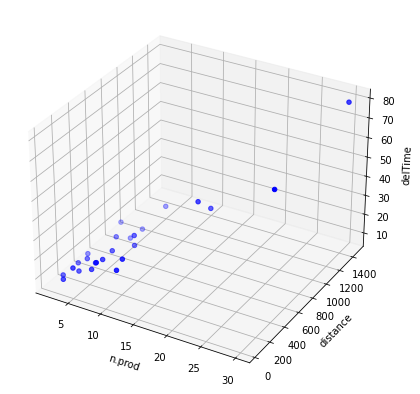

In [10]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111,projection='3d' )
ax.scatter(xs = delivery["n.prod"], ys = delivery["distance"],zs=delivery["delTime"],color='blue')
ax.set_xlabel("n.prod")
ax.set_ylabel("distance")
ax.set_zlabel("delTime")

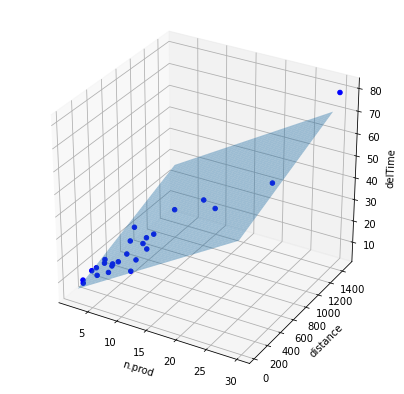

In [11]:
#Setting up the plot area
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111,projection='3d')#projection = '3d' is used to have 3D axes

#3d scatterplot of the delivery dataset
ax.scatter(xs = delivery["n.prod"], ys = delivery["distance"], zs=delivery["delTime"],
           c='blue',
           alpha=1,
           marker='o')
ax.set_xlabel("n.prod")
ax.set_ylabel("distance")
ax.set_zlabel("delTime")

#Creating a mesh of x and y values to plot the regression plane
x_surf = np.arange(delivery["n.prod"].min(), delivery["n.prod"].max(), 1) 
y_surf = np.arange(delivery["distance"].min(), delivery["distance"].max(), 1)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)
X_mesh = pd.core.frame.DataFrame({'n.prod': x_surf.ravel(), 'distance': y_surf.ravel()})

#Predicting the output of model for every point in the mesh
out = model.predict(X_mesh)

#Plotting the regression plane
ax.plot_surface(x_surf, y_surf,
                out.reshape(x_surf.shape),
                alpha = 0.4) # apha => transparency of the surface

#### Validating the model

In [12]:
# score() method for regression model, returns the 'coefficient of determination' (r^2) value for the model
print(model.score(X,y))

0.9595937494832257


#### Comparison between model r-squared based on number of predictors
R^2 value ranges between 0 to 1. R^2 value explains the amount of variance of the dependant variable that can be explained by the independant variable.

In [13]:
# Model with a single predictor - n.prod
model1 = LinearRegression()
features = ["n.prod"]
target = ["delTime"]
model1.fit(delivery[features],delivery[target])
print(model1.score(delivery[features],delivery[target]))

0.9304813135986855


In [14]:
# Model with multiple predictors - n.prod,distance
model2 = LinearRegression()
features = ["n.prod","distance"]
target = ["delTime"]
model2.fit(delivery[features],delivery[target])
print(model2.score(delivery[features],delivery[target]))

0.9595937494832257


#### Computation of adjusted R-Squared
Adjusted R-Squared takes into account the number of instances and the number of features considered to buld a model, while calculating the co-efficient of determination.

In [15]:
X = delivery[features]
y = delivery[target]
adjusted_rscore = 1 - (1-model2.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)
print(adjusted_rscore)

0.9559204539817008


### Feature Engineering in Detail for Multiple Linear Regression

#### Correlation between the predictors
<pre>
Correlation value ranges from -1 to 1.
Negative correlation value between 2 parameters, indicate that the parameters are inversly proportional.
Positive correlation value between 2 parameters, indicate that the parameters are directly propotional to each other.
Zero correlation indicates no relationship between 2 parameters.
</pre>

In [16]:
# finding the correlation
np.corrcoef(delivery["n.prod"],delivery["distance"])

# correlation value derived - 0.824215

array([[1.      , 0.824215],
       [0.824215, 1.      ]])

#### Selecting the right predictors using Variance Inflation Factor (VIF)
<pre>
The features/predictors selected for building the model are independant of rest of the features.
Example, consider features 'A', 'B' and 'C'. If we try to predict one of the features, using the rest of the features,  the model should give a poor R-Squared value, indicating that the predicted feature is independant of the rest.
We can check this using Variance Inflation Factor (VIF). VIF of a predictor range from 1 and above.
If VIF of a predictor value is 1 => feature is independant, and is good predictor
                        value 1-5 => moderatly independant, can be considered as predictor.
                        value >=5 => dependant on other features, should not be considered as a predictor.
</pre>

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [18]:
#calculating the VIF for each attributes
vif = pd.Series([variance_inflation_factor(X.values,idx) 
           for idx in range(X.shape[1])],
          index=X.columns)
print(vif)

n.prod      7.848245
distance    7.848245
dtype: float64
